In [1]:
pip install pandas

# **Import core Libraries**

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import sklearn.metrics as sm
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Load the data**

In [4]:
df = pd.read_csv(r"/content/drive/MyDrive/CI/train.csv")

# **Print dataset**

In [5]:
df.head()

,Customer_ID,Age,Gender,Location,Subscription_Type,Account_Age_Months,Monthly_Spending,Total_Usage_Hours,Support_Calls,Late_Payments,Streaming_Usage,Discount_Used,Satisfaction_Score,Last_Interaction_Type,Complaint_Tickets,Promo_Opted_In,Churn
0,1001,19,Male,Illinois,Basic,50,152.44,416,5,2,61,76,3,Neutral,0,1,1
1,1002,41,Male,California,Premium,14,113.34,36,5,1,17,90,5,Negative,3,0,0
2,1003,44,Female,Florida,Basic,2,168.39,207,3,1,85,12,6,Neutral,3,0,1
3,1004,21,Male,Florida,Basic,55,197.12,379,4,3,54,32,4,Positive,3,1,0
4,1005,65,Male,New York,Premium,12,84.46,475,5,4,82,62,1,Neutral,0,0,1


# **Describe dataset**

In [6]:
df.describe()

,Customer_ID,Age,Account_Age_Months,Monthly_Spending,Total_Usage_Hours,Support_Calls,Late_Payments,Streaming_Usage,Discount_Used,Satisfaction_Score,Complaint_Tickets,Promo_Opted_In,Churn
count,8000.00000,8000.000000,8000.000000,8000.000000,8000.000000,8000.00000,8000.00000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,5000.50000,43.542250,30.163875,104.804641,254.326625,4.45325,1.99250,49.798000,49.428250,5.462375,1.970500,0.499750,0.313125
std,2309.54541,14.909242,16.942407,54.643255,140.855632,2.88892,1.39971,28.965468,28.662071,2.879865,1.413375,0.500031,0.463794
min,1001.00000,18.000000,1.000000,10.090000,10.000000,0.00000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,3000.75000,31.000000,15.000000,57.637500,133.000000,2.00000,1.00000,24.000000,25.000000,3.000000,1.000000,0.000000,0.000000
50%,5000.50000,44.000000,30.000000,104.690000,256.500000,4.00000,2.00000,51.000000,50.000000,5.000000,2.000000,0.000000,0.000000
75%,7000.25000,57.000000,45.000000,151.697500,376.000000,7.00000,3.00000,75.000000,74.000000,8.000000,3.000000,1.000000,1.000000
max,9000.00000,69.000000,59.000000,199.940000,499.000000,9.00000,4.00000,99.000000,99.000000,10.000000,4.000000,1.000000,1.000000


# **Check data types**

In [7]:
print(df.dtypes)

Customer_ID                int64
Age                        int64
Gender                    object
Location                  object
Subscription_Type         object
Account_Age_Months         int64
Monthly_Spending         float64
Total_Usage_Hours          int64
Support_Calls              int64
Late_Payments              int64
Streaming_Usage            int64
Discount_Used              int64
Satisfaction_Score         int64
Last_Interaction_Type     object
Complaint_Tickets          int64
Promo_Opted_In             int64
Churn                      int64
dtype: object


# **Missing values checking**

In [8]:
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 Customer_ID              0
Age                      0
Gender                   0
Location                 0
Subscription_Type        0
Account_Age_Months       0
Monthly_Spending         0
Total_Usage_Hours        0
Support_Calls            0
Late_Payments            0
Streaming_Usage          0
Discount_Used            0
Satisfaction_Score       0
Last_Interaction_Type    0
Complaint_Tickets        0
Promo_Opted_In           0
Churn                    0
dtype: int64


# **Check Column names**

In [9]:
df.columns

Index(['Customer_ID', 'Age', 'Gender', 'Location', 'Subscription_Type',
       'Account_Age_Months', 'Monthly_Spending', 'Total_Usage_Hours',
       'Support_Calls', 'Late_Payments', 'Streaming_Usage', 'Discount_Used',
       'Satisfaction_Score', 'Last_Interaction_Type', 'Complaint_Tickets',
       'Promo_Opted_In', 'Churn'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Customer_ID            8000 non-null   int64  
 1   Age                    8000 non-null   int64  
 2   Gender                 8000 non-null   object 
 3   Location               8000 non-null   object 
 4   Subscription_Type      8000 non-null   object 
 5   Account_Age_Months     8000 non-null   int64  
 6   Monthly_Spending       8000 non-null   float64
 7   Total_Usage_Hours      8000 non-null   int64  
 8   Support_Calls          8000 non-null   int64  
 9   Late_Payments          8000 non-null   int64  
 10  Streaming_Usage        8000 non-null   int64  
 11  Discount_Used          8000 non-null   int64  
 12  Satisfaction_Score     8000 non-null   int64  
 13  Last_Interaction_Type  8000 non-null   object 
 14  Complaint_Tickets      8000 non-null   int64  
 15  Prom

# **Quick dataset shape & churn rate**

In [11]:
print(f"Shape: {df.shape}")
print(f"Churn Rate: {df['Churn'].mean():.2%}")

Shape: (8000, 17)
Churn Rate: 31.31%


# **Churn Distribution (Pie Chart)**

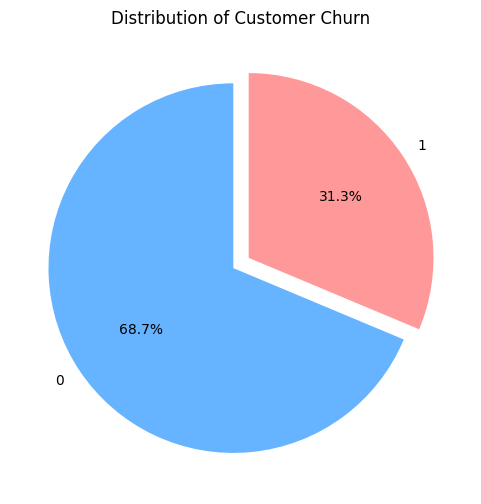

In [12]:
plt.figure(figsize=(6, 6))
df['Churn'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#ff9999'], explode=[0.05, 0.05])
plt.title('Distribution of Customer Churn')
plt.ylabel('')
plt.savefig('churn_distribution.png')
plt.show()

# **Churn vs Non-Churn (Countplot)**

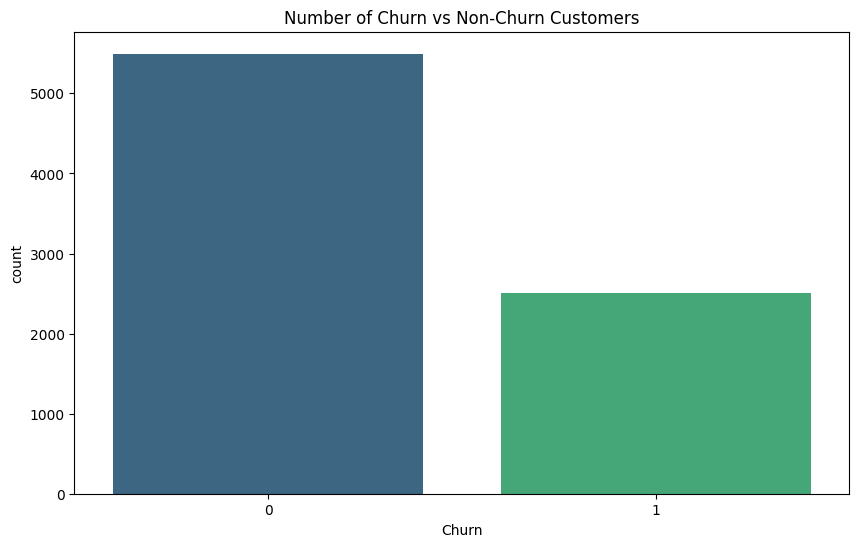

In [13]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Churn', hue='Churn', data=df, palette='viridis', legend=False)
plt.title("Number of Churn vs Non-Churn Customers")
plt.savefig('churn_vs_Non-Churn Customers.png')
plt.show()

# **Gender vs Churn (Countplot)**

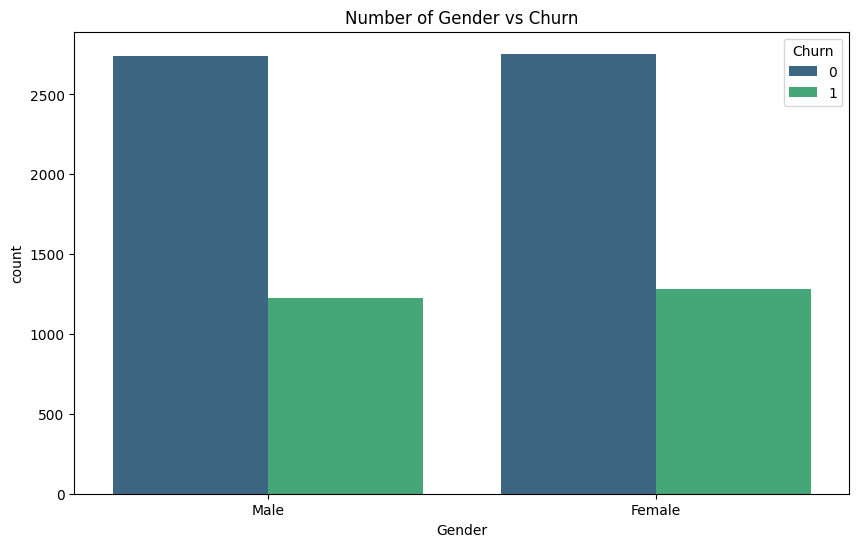

In [14]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', hue='Churn', data=df, palette='viridis')
plt.title('Number of Gender vs Churn')
plt.savefig('Gender_vs_churn.png')
plt.show()

# **Location vs Churn (Countplot)**

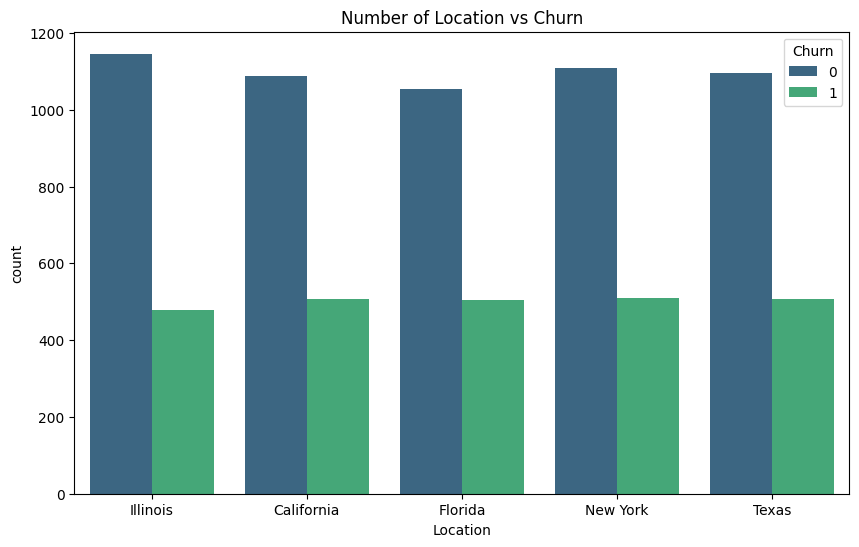

In [15]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Location', hue='Churn', data=df, palette='viridis')
plt.title('Number of Location vs Churn')
plt.savefig('Location_vs_churn.png')
plt.show()

# **Subscription Type vs Churn (Countplot)**

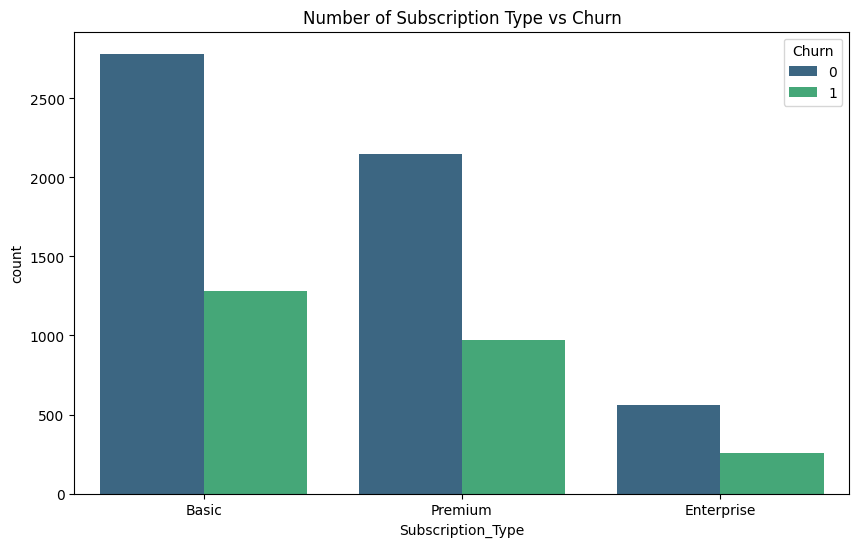

In [16]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Subscription_Type', hue='Churn', data=df, palette='viridis')
plt.title('Number of Subscription Type vs Churn')
plt.savefig('Subscription_Type_vs_churn.png')
plt.show()

# **Last Interaction Type vs Churn (Countplot)**

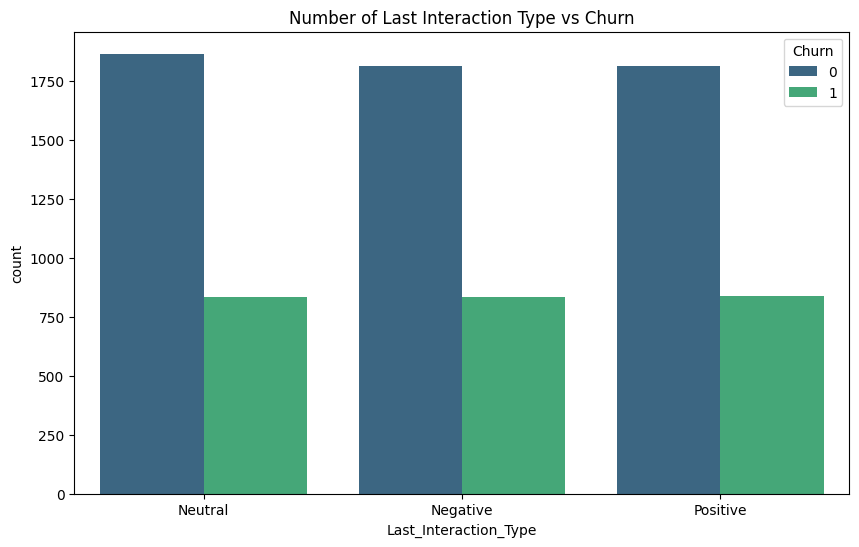

In [17]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Last_Interaction_Type', hue='Churn', data=df, palette='viridis')
plt.title('Number of Last Interaction Type vs Churn')
plt.savefig('Last_Interaction_Type_vs_churn.png')
plt.show()

# **Monthly Spending vs Churn (KDE Plot)**

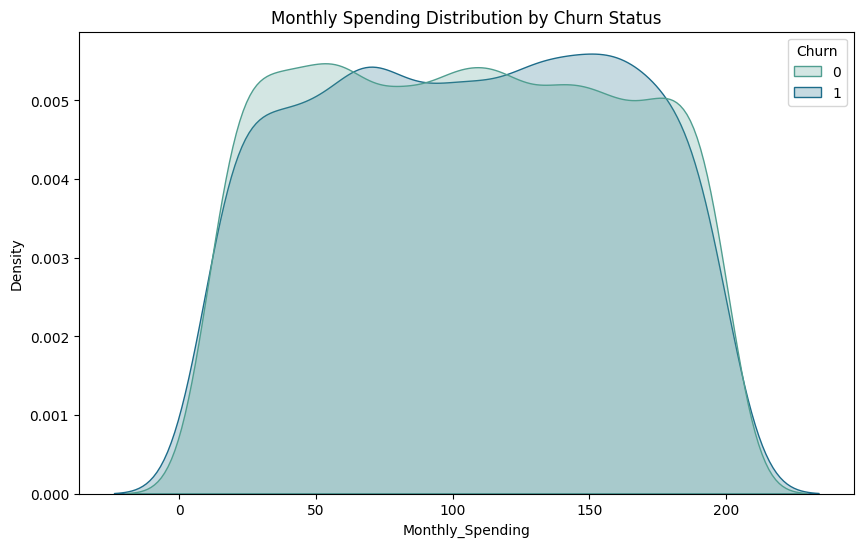

In [18]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='Monthly_Spending', hue='Churn', fill=True, common_norm=False, palette='crest')
plt.title('Monthly Spending Distribution by Churn Status')
plt.savefig('spending_vs_churn.png')
plt.show()

# **Correlation Heatmap**

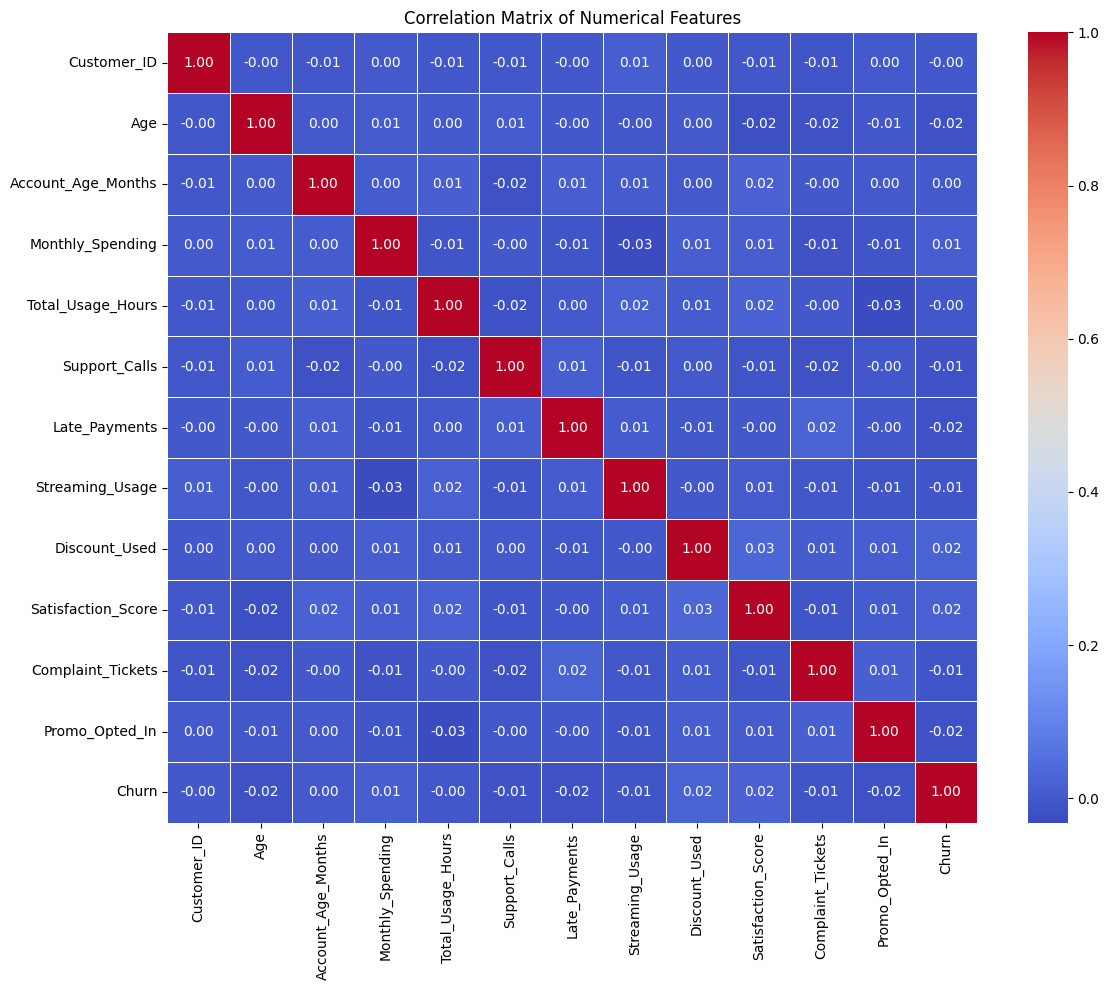

In [19]:
plt.figure(figsize=(12, 10))
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = df[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.savefig('correlation_heatmap.png')
plt.show()

# **Histogram for Numeric Columns**

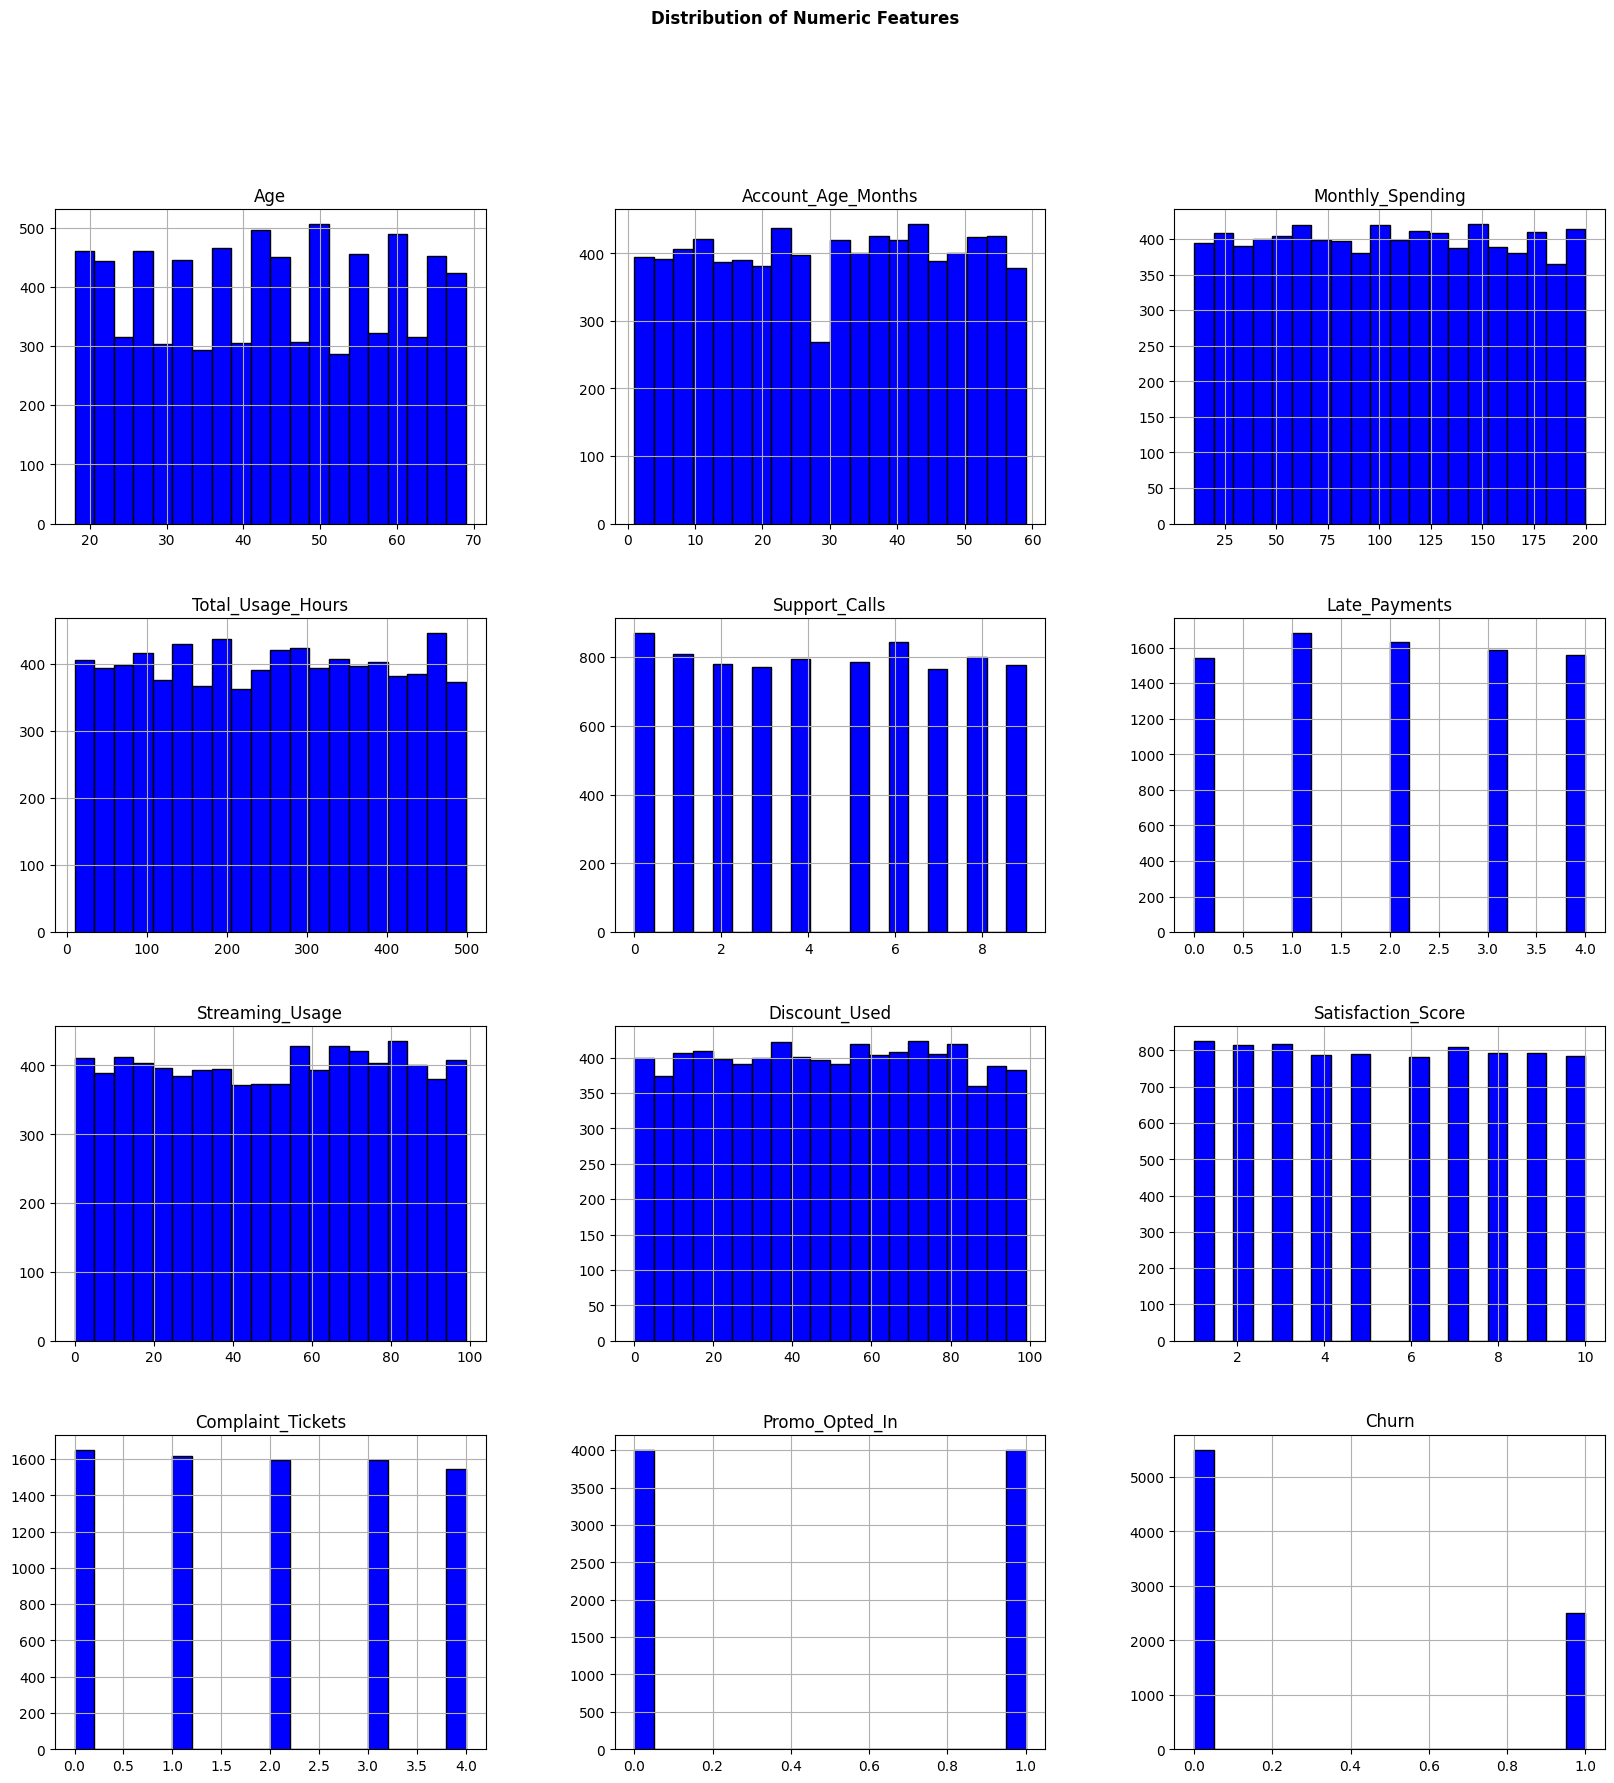

In [20]:
numeric_cols = ['Age', 'Account_Age_Months', 'Monthly_Spending', 'Total_Usage_Hours', 'Support_Calls', 'Late_Payments',
                'Streaming_Usage', 'Discount_Used', 'Satisfaction_Score', 'Complaint_Tickets', 'Promo_Opted_In', 'Churn']

df[numeric_cols].hist(bins=20, figsize=(20, 20), edgecolor='black', color='blue')
plt.suptitle("Distribution of Numeric Features", weight='bold')
plt.show()

# **Statistical Analysis & Feature Selection**

In [21]:
from scipy.stats import pointbiserialr, chi2_contingency

# Identify target variable
target = 'Churn'

# Separate numerical and categorical features (excluding ID and target)
numerical_features = df.select_dtypes(include=['int64', 'float64']).drop(columns=['Customer_ID', target]).columns
categorical_features = df.select_dtypes(include=['object']).columns

# 1. Point-biserial correlation for numerical features
num_pvals = {}
for col in numerical_features:
    _, pval = pointbiserialr(df[col], df[target])
    num_pvals[col] = pval

# 2. Chi-square test for categorical features
cat_pvals = {}
for col in categorical_features:
    contingency = pd.crosstab(df[col], df[target])
    _, pval, _, _ = chi2_contingency(contingency)
    cat_pvals[col] = pval

# Combine and sort
pval_df = pd.DataFrame({
    'Feature': list(num_pvals.keys()) + list(cat_pvals.keys()),
    'P-Value': list(num_pvals.values()) + list(cat_pvals.values()),
    'Type': ['Numerical'] * len(num_pvals) + ['Categorical'] * len(cat_pvals)
}).sort_values(by='P-Value')

# Display results
pval_df.reset_index(drop=True, inplace=True)
pval_df

,Feature,P-Value,Type
0,Discount_Used,0.068066,Numerical
1,Satisfaction_Score,0.076294,Numerical
2,Promo_Opted_In,0.124371,Numerical
3,Late_Payments,0.137587,Numerical
4,Age,0.141035,Numerical
5,Support_Calls,0.248171,Numerical
6,Complaint_Tickets,0.330092,Numerical
7,Monthly_Spending,0.410531,Numerical
8,Streaming_Usage,0.435023,Numerical
9,Gender,0.439264,Categorical


# **Feature Importance Based on P-Value**

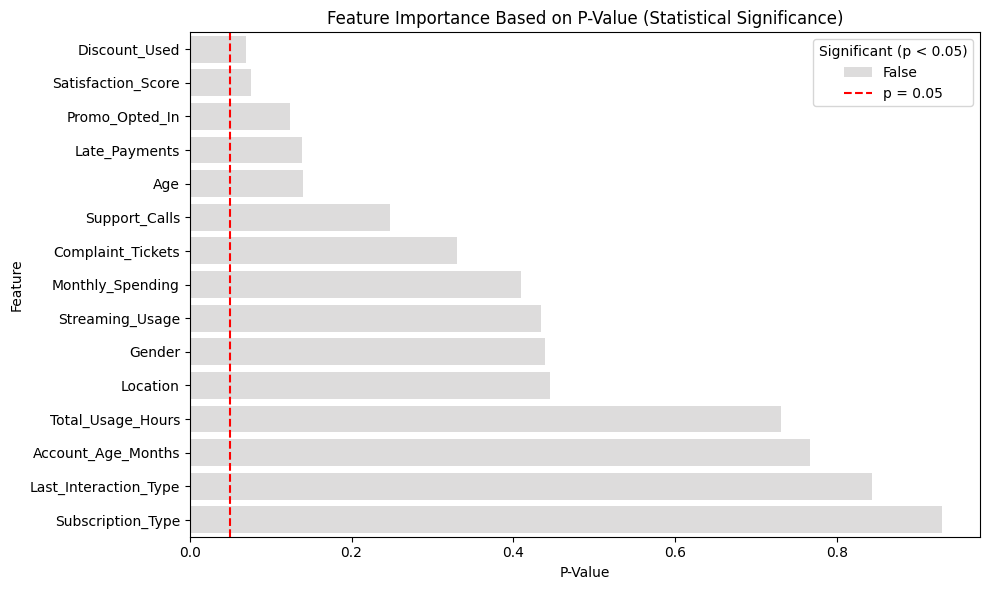

In [22]:
from scipy import stats

# Separate features
target = 'Churn'
numerical_cols = df.select_dtypes(include=['int64', 'float64']).drop(columns=['Customer_ID', target]).columns
categorical_cols = df.select_dtypes(include='object').columns

# Calculate p-values for numerical features
numerical_pvals = {}
for col in numerical_cols:
    group0 = df[df[target] == 0][col]
    group1 = df[df[target] == 1][col]
    _, pval = stats.ttest_ind(group0, group1, equal_var=False)
    numerical_pvals[col] = pval

# Calculate p-values for categorical features
categorical_pvals = {}
for col in categorical_cols:
    contingency = pd.crosstab(df[col], df[target])
    _, pval, _, _ = stats.chi2_contingency(contingency)
    categorical_pvals[col] = pval

# Combine all p-values
pvals = {**numerical_pvals, **categorical_pvals}
pvals_df = pd.DataFrame.from_dict(pvals, orient='index', columns=['p_value'])
pvals_df['Feature'] = pvals_df.index
pvals_df = pvals_df.sort_values(by='p_value', ascending=True)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=pvals_df, x='p_value', y='Feature', palette='coolwarm', hue=(pvals_df['p_value'] < 0.05))
plt.axvline(0.05, color='red', linestyle='--', label='p = 0.05')
plt.title("Feature Importance Based on P-Value (Statistical Significance)")
plt.xlabel("P-Value")
plt.ylabel("Feature")
plt.legend(title='Significant (p < 0.05)', loc='upper right')
plt.tight_layout()
plt.show()

# **Outlier Detection**



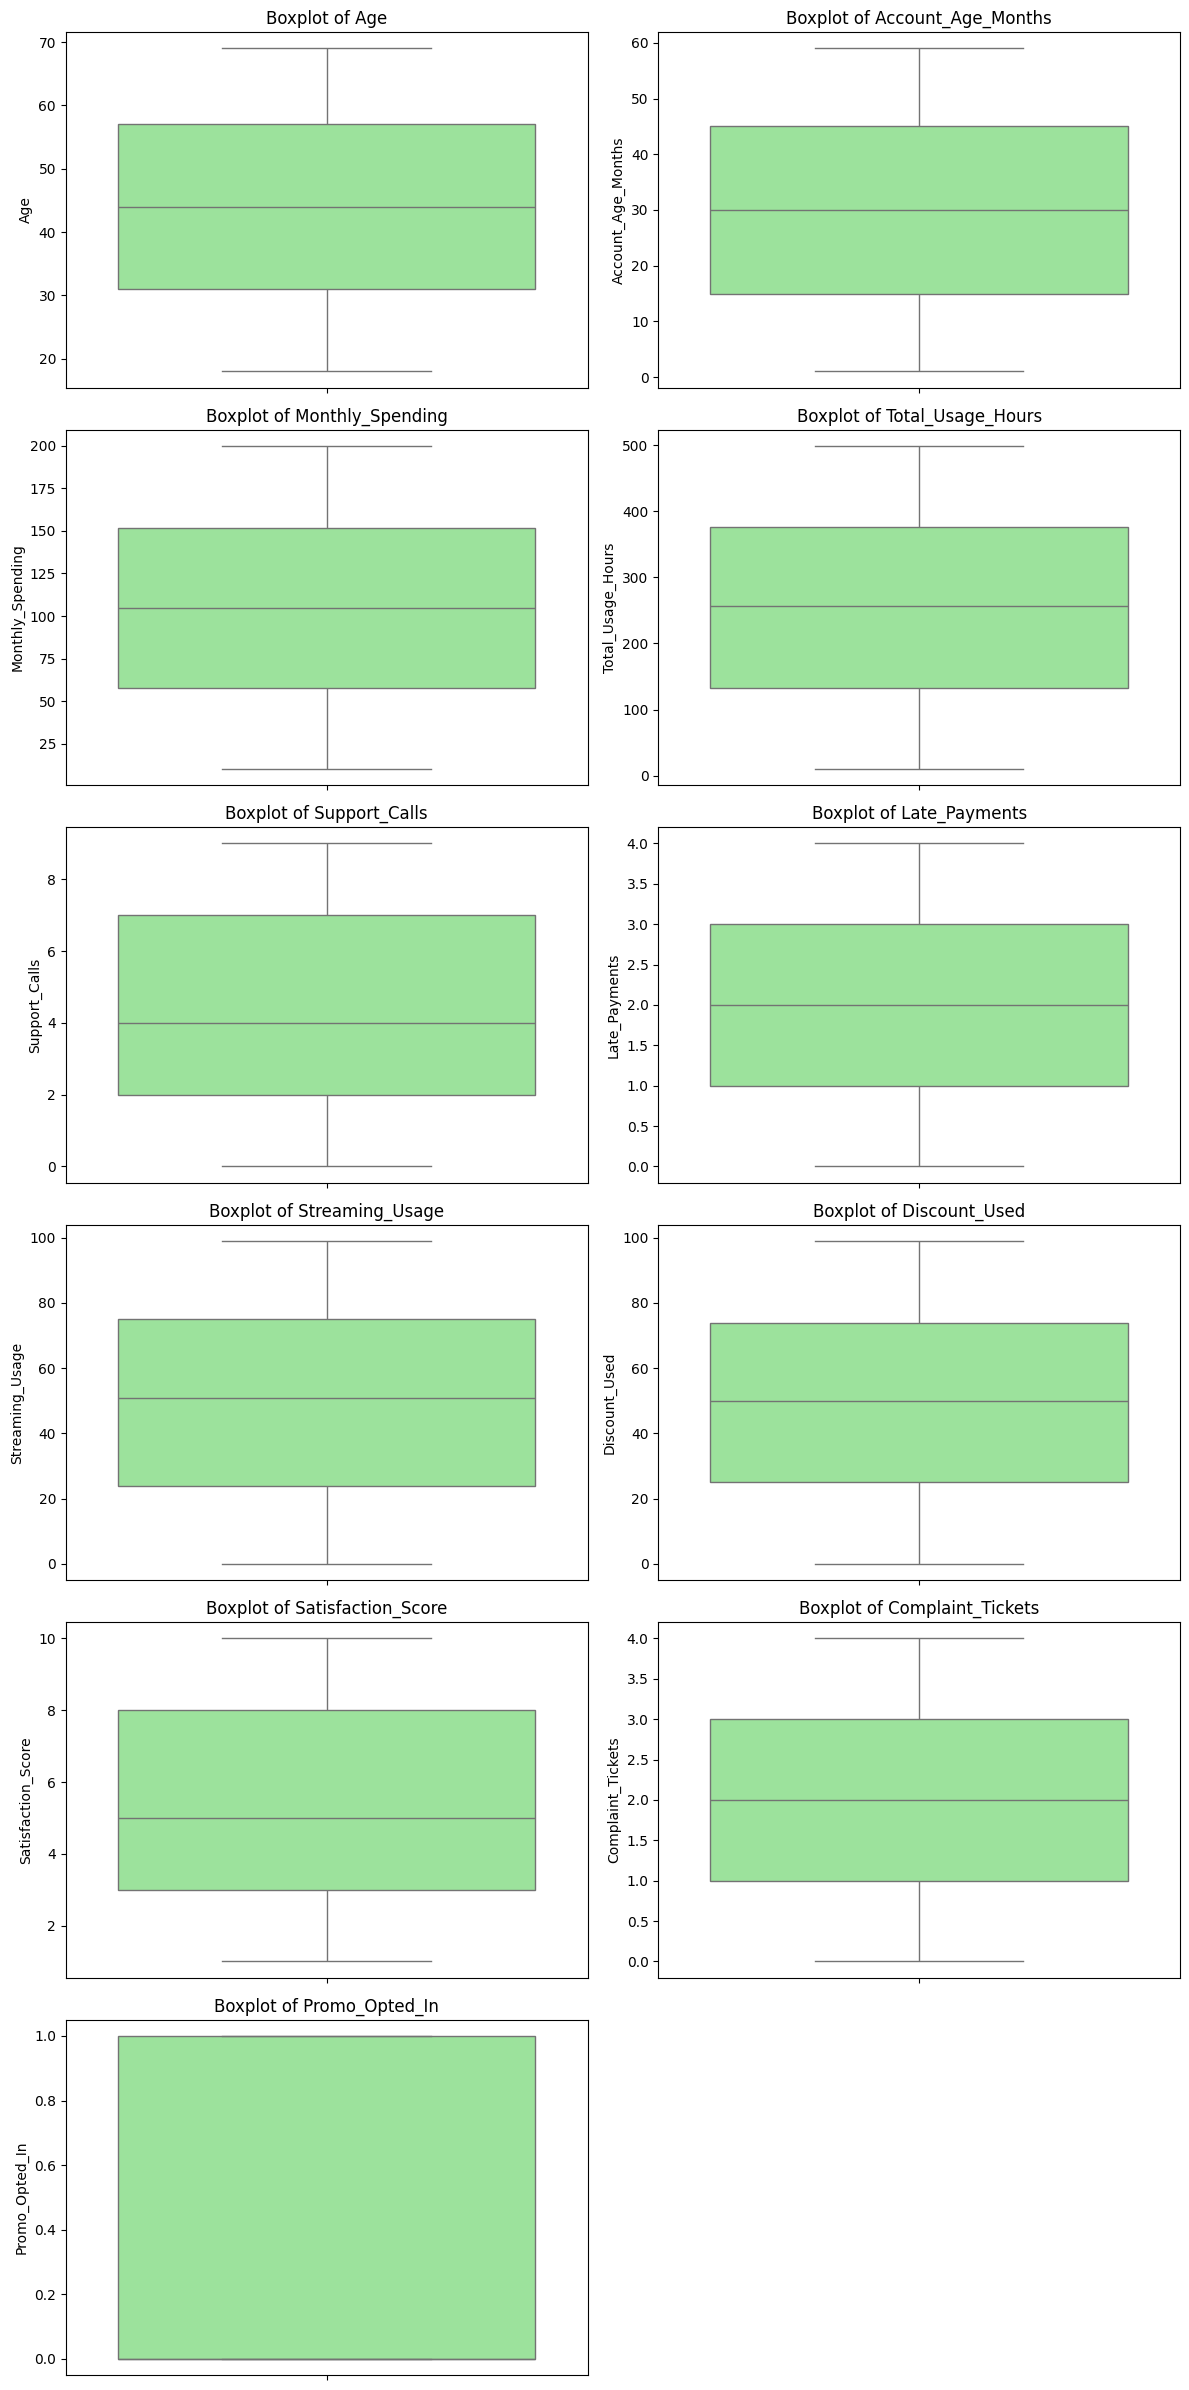

In [23]:
import math

# Selecting numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).drop(columns=['Customer_ID', 'Churn']).columns

n_cols = 2
n_rows = math.ceil(len(numeric_cols) / n_cols)
plt.figure(figsize=(12, n_rows * 4))

for i, col in enumerate(numeric_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(y=df[col], color='lightgreen')
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

# **Outlier Detection using IQR Method**

In [24]:
# Function to detect outliers using IQR
def count_outliers_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = series[(series < lower) | (series > upper)]
    return len(outliers), outliers.tolist()

# List of numeric columns (excluding ID and target)
numeric_cols = df.select_dtypes(include=['int64', 'float64']).drop(columns=['Customer_ID', 'Churn']).columns

# Create outlier summary table
summary_data = []

for col in numeric_cols:
    count, values = count_outliers_iqr(df[col])
    percentage = round((count / len(df)) * 100, 2)
    summary_data.append({
        'Feature': col,
        'Outlier Count': count,
        'Outlier %': percentage,
        'Outlier Sample': values[:5]  # Show first 5 outlier values
    })

outlier_summary_df = pd.DataFrame(summary_data)
print(outlier_summary_df)

               Feature  Outlier Count  Outlier % Outlier Sample
0                  Age              0        0.0             []
1   Account_Age_Months              0        0.0             []
2     Monthly_Spending              0        0.0             []
3    Total_Usage_Hours              0        0.0             []
4        Support_Calls              0        0.0             []
5        Late_Payments              0        0.0             []
6      Streaming_Usage              0        0.0             []
7        Discount_Used              0        0.0             []
8   Satisfaction_Score              0        0.0             []
9    Complaint_Tickets              0        0.0             []
10      Promo_Opted_In              0        0.0             []


# **Encoding Categorical Data**

In [25]:
df['Gender'] = df['Gender'].map({'Female': 0, 'Male': 1})
df['Location'] = df['Location'].map({"Illinois": 0, "California": 1, "Florida": 2, "New York": 3, "Texas": 4})
df['Subscription_Type'] = df['Subscription_Type'].map({"Basic": 0, "Premium": 1, "Enterprise": 2})
df['Last_Interaction_Type'] = df['Last_Interaction_Type'].map({"Negative": 0, "Neutral": 1, "Positive": 2})

# **Data Preprocessing**

In [26]:
features = df.drop(['Customer_ID', 'Churn'], axis=1)
labels = df['Churn']

# **Seeing whether the data and the outliers are correct**

In [27]:
df.isnull().sum()*100/df.shape[0]

,0
Customer_ID,0.0
Age,0.0
Gender,0.0
Location,0.0
Subscription_Type,0.0
Account_Age_Months,0.0
Monthly_Spending,0.0
Total_Usage_Hours,0.0
Support_Calls,0.0
Late_Payments,0.0


# **Division of the data into training and testing.**

In [28]:
x_train, x_test, y_train, y_test = train_test_split(features,
                                                    labels,
                                                    test_size=0.1,
                                                    random_state=4200)

In [29]:
df['Churn'].value_counts(normalize=True)

,proportion
Churn,
0,0.686875
1,0.313125


# **Technical Set-up Managing Class Imbalances.**

In [30]:
!pip install imbalanced-learn

In [31]:
from imblearn.over_sampling import SMOTE

In [32]:
smote = SMOTE(random_state=4200)

In [33]:
x_train_bal, y_train_bal = smote.fit_resample(x_train, y_train)

In [34]:
from collections import Counter
print("Before SMOTE:", Counter(y_train))
print("After SMOTE:", Counter(y_train_bal))

Before SMOTE: Counter({0: 4930, 1: 2270})
After SMOTE: Counter({1: 4930, 0: 4930})


In [35]:
from sklearn.naive_bayes import GaussianNB

In [36]:
model = GaussianNB()
model.fit(x_train_bal, y_train_bal)

GaussianNB()

In [37]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    confusion_matrix,
    f1_score)

In [38]:
predictions = model.predict(x_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, predictions)
prec = precision_score(y_test, predictions)
rec = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

print(f"Accuracy:  {accuracy * 100:.2f}%")
print(f"Precision: {prec * 100:.2f}%")
print(f"Recall:    {rec * 100:.2f}%")
print(f"F1 Score:  {f1 * 100:.2f}%")

Accuracy:  53.25%
Precision: 27.51%
Recall:    36.17%
F1 Score:  31.25%


In [39]:
cm  = confusion_matrix(y_test, predictions)

Text(45.58159722222221, 0.5, 'Actual')

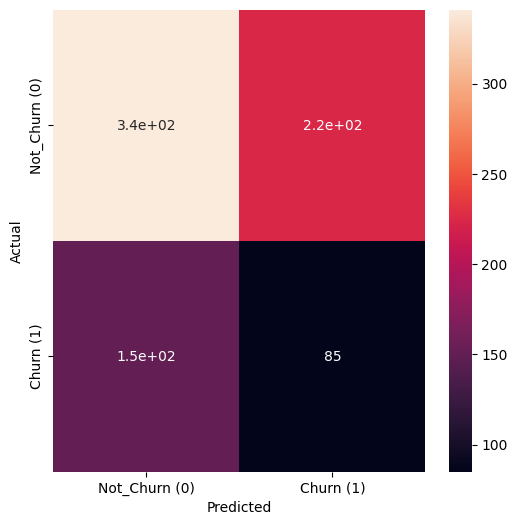

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True,
            xticklabels=['Not_Churn (0)', 'Churn (1)'],
            yticklabels=['Not_Churn (0)', 'Churn (1)'])
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [41]:
predictions = model.predict(x_train_bal)

accuracy = accuracy_score(y_train_bal, predictions)
prec = precision_score(y_train_bal, predictions)
rec = recall_score(y_train_bal, predictions)
f1 = f1_score(y_train_bal, predictions)

print("Accuracy: ", accuracy * 100)
print("Recall: ", rec * 100)
print("Precision: ", prec * 100)
print("F1: ", f1 * 100)

Accuracy:  64.3103448275862
Recall:  66.06490872210954
Precision:  63.8252008622379
F1:  64.9257450413635


In [42]:
!pip install xgboost catboost lightgbm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.1 MB/s eta 0:00:00


In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

In [44]:
model_dt = DecisionTreeClassifier()
model_rf = RandomForestClassifier()
model_xgboost = XGBClassifier()
model_cat = CatBoostClassifier()
model_lgbm = LGBMClassifier()

In [45]:
model_dt.fit(x_train_bal, y_train_bal)
model_rf.fit(x_train_bal, y_train_bal)
model_xgboost.fit(x_train_bal, y_train_bal)
model_cat.fit(x_train_bal, y_train_bal)
model_lgbm.fit(x_train_bal, y_train_bal)

Learning rate set to 0.027373
0:	learn: 0.6904038	total: 81.6ms	remaining: 1m 21s
1:	learn: 0.6878528	total: 86ms	remaining: 42.9s
2:	learn: 0.6855938	total: 90.4ms	remaining: 30.1s
3:	learn: 0.6829767	total: 94.5ms	remaining: 23.5s
4:	learn: 0.6804594	total: 98.6ms	remaining: 19.6s
5:	learn: 0.6780735	total: 103ms	remaining: 17s
6:	learn: 0.6758825	total: 107ms	remaining: 15.1s
7:	learn: 0.6738166	total: 111ms	remaining: 13.7s
8:	learn: 0.6717156	total: 115ms	remaining: 12.6s
9:	learn: 0.6703314	total: 120ms	remaining: 11.9s
10:	learn: 0.6683206	total: 125ms	remaining: 11.3s
11:	learn: 0.6666362	total: 131ms	remaining: 10.8s
12:	learn: 0.6649150	total: 136ms	remaining: 10.3s
13:	learn: 0.6633711	total: 141ms	remaining: 9.94s
14:	learn: 0.6617959	total: 146ms	remaining: 9.58s
15:	learn: 0.6602703	total: 150ms	remaining: 9.2s
16:	learn: 0.6586987	total: 155ms	remaining: 8.96s
17:	learn: 0.6575335	total: 160ms	remaining: 8.71s
18:	learn: 0.6562941	total: 165ms	remaining: 8.52s
19:	learn:

LGBMClassifier()

In [46]:
model_dict = {
    "DT" : DecisionTreeClassifier(),
    "RF" : RandomForestClassifier(),
    "XGB" : XGBClassifier(),
    "CAT" : CatBoostClassifier(),
    "LGBM" : LGBMClassifier()
}

In [47]:
predictions = model.predict(x_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, predictions)
prec = precision_score(y_test, predictions)
rec = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

print(f"Accuracy:  {accuracy * 100:.2f}%")
print(f"Precision: {prec * 100:.2f}%")
print(f"Recall:    {rec * 100:.2f}%")
print(f"F1 Score:  {f1 * 100:.2f}%")

Accuracy:  53.25%
Precision: 27.51%
Recall:    36.17%
F1 Score:  31.25%


In [48]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

def calculate_performance(y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    cm = confusion_matrix(y_true, y_pred)
    return acc, prec, rec, f1, cm

In [49]:
results = []
for model_name, model in model_dict.items():
    model.fit(x_train_bal, y_train_bal)
    predictions = model.predict(x_test)
    acc, prec, rec, f1, cm = calculate_performance(
        y_test, predictions)
    results.append({
        "Model" : model_name,
        "Accuracy" : acc,
        "Precision" : prec,
        "Recall" : rec,
        "F1" : f1
    })

Learning rate set to 0.027373
0:	learn: 0.6904038	total: 19.7ms	remaining: 19.7s
1:	learn: 0.6878528	total: 35.3ms	remaining: 17.6s
2:	learn: 0.6855938	total: 46.5ms	remaining: 15.5s
3:	learn: 0.6829767	total: 57ms	remaining: 14.2s
4:	learn: 0.6804594	total: 69.5ms	remaining: 13.8s
5:	learn: 0.6780735	total: 82.2ms	remaining: 13.6s
6:	learn: 0.6758825	total: 92.3ms	remaining: 13.1s
7:	learn: 0.6738166	total: 102ms	remaining: 12.6s
8:	learn: 0.6717156	total: 113ms	remaining: 12.4s
9:	learn: 0.6703314	total: 124ms	remaining: 12.2s
10:	learn: 0.6683206	total: 135ms	remaining: 12.1s
11:	learn: 0.6666362	total: 151ms	remaining: 12.5s
12:	learn: 0.6649150	total: 167ms	remaining: 12.7s
13:	learn: 0.6633711	total: 182ms	remaining: 12.8s
14:	learn: 0.6617959	total: 195ms	remaining: 12.8s
15:	learn: 0.6602703	total: 205ms	remaining: 12.6s
16:	learn: 0.6586987	total: 230ms	remaining: 13.3s
17:	learn: 0.6575335	total: 248ms	remaining: 13.5s
18:	learn: 0.6562941	total: 273ms	remaining: 14.1s
19:	le

In [50]:
results_df = pd.DataFrame(results)
results_df

,Model,Accuracy,Precision,Recall,F1
0,DT,0.52625,0.290698,0.425532,0.345423
1,RF,0.64375,0.351190,0.251064,0.292804
2,XGB,0.58500,0.303644,0.319149,0.311203
3,CAT,0.61000,0.320930,0.293617,0.306667
4,LGBM,0.60750,0.305419,0.263830,0.283105


In [51]:
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostClassifier

param_grid = {
    'depth': [4, 6, 8, 10],
    'learning_rate': [0.01, 0.05, 0.1],
    'iterations': [100, 300, 500],
    'l2_leaf_reg': [1, 3, 5, 7]
}

cat_model = CatBoostClassifier(verbose=0, random_state=3500)

search = RandomizedSearchCV(
    cat_model,
    param_distributions=param_grid,
    n_iter=10,
    scoring='f1',
    cv=5,
    random_state=3500,
    n_jobs=-1
)

search.fit(x_train_bal, y_train_bal)
best_cat = search.best_estimator_

Accuracy: 63.375
Precision: 35.051546391752574
Recall: 28.936170212765955
F1 Score: 0.317016317016317


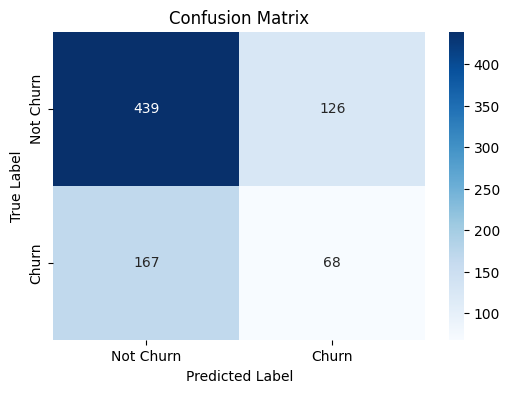

In [52]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

predictions = best_cat.predict(x_test)

accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
cm = confusion_matrix(y_test, predictions)

print("Accuracy:", accuracy * 100)
print("Precision:", precision * 100)
print("Recall:", recall * 100)
print("F1 Score:", f1)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Churn', 'Churn'],
            yticklabels=['Not Churn', 'Churn'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [53]:
import numpy as np
from sklearn.metrics import f1_score

probs = best_cat.predict_proba(x_test)[:, 1]

thresholds = np.arange(0.30, 0.71, 0.01)
best_f1 = 0
best_threshold = 0.5

for t in thresholds:
    preds = (probs > t).astype(int)
    f1 = f1_score(y_test, preds)
    if f1 > best_f1:
        best_f1 = f1
        best_threshold = t

print(f"Best F1 Score: {best_f1:.4f} at threshold: {best_threshold}")

Best F1 Score: 0.3978 at threshold: 0.3


Accuracy: 59.375
Precision: 35.19736842105263
Recall: 45.53191489361702
F1 Score: 0.3970315398886827


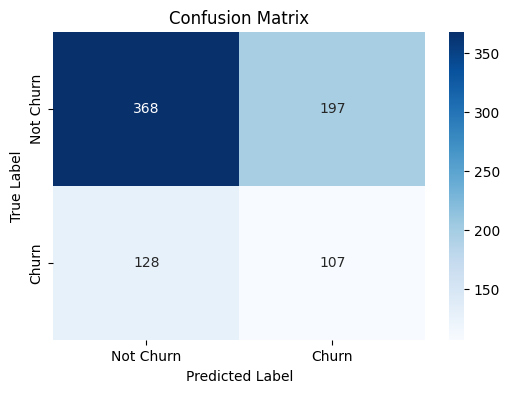

In [54]:
final_preds = (probs > 0.31).astype(int)

accuracy = accuracy_score(y_test, final_preds)
precision = precision_score(y_test, final_preds)
recall = recall_score(y_test, final_preds)
f1 = f1_score(y_test, final_preds)
cm = confusion_matrix(y_test, final_preds)

print("Accuracy:", accuracy * 100)
print("Precision:", precision * 100)
print("Recall:", recall * 100)
print("F1 Score:", f1)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Churn', 'Churn'],
            yticklabels=['Not Churn', 'Churn'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [55]:
test_df = pd.read_csv(r'/content/drive/MyDrive/CI/test.csv')

In [56]:
test_df['Gender'] = test_df['Gender'].map({'Female': 0, 'Male': 1})
test_df['Location'] = test_df['Location'].map({
    "Illinois": 0, "California": 1, "Florida": 2, "New York": 3, "Texas": 4
})
test_df['Subscription_Type'] = test_df['Subscription_Type'].map({
    "Basic": 0, "Premium": 1, "Enterprise": 2
})
test_df['Last_Interaction_Type'] = test_df['Last_Interaction_Type'].map({
    "Neutral": 0, "Negative": 1, "Positive": 2
})

In [57]:
test_features = test_df.drop(['Customer_ID'], axis=1)

In [58]:
print("Gender:", test_df['Gender'].unique())
print("Location:", test_df['Location'].unique())
print("Subscription_Type:", test_df['Subscription_Type'].unique())
print("Last_Interaction_Type:", test_df['Last_Interaction_Type'].unique())

Gender: [0 1]
Location: [3 0 1 4 2]
Subscription_Type: [1 0 2]
Last_Interaction_Type: [1 0 2]


In [59]:
test_probs = model_cat.predict_proba(test_features)[:, 1]

test_predictions = (test_probs >= 0.30).astype(int)

In [60]:
from google.colab import files
submission = pd.DataFrame({
    'Customer_ID': test_df['Customer_ID'],
    'Churn': test_predictions
})

submission.to_csv('Submissions.csv', index=False)
files.download('Submissions.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [61]:
import pickle

with open('trained_model.pkl', 'wb') as f:
    pickle.dump(best_cat, f)
    files.download('trained_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>